In [1]:
%load_ext autoreload
%autoreload 2s

In [366]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from astropy import table
from astropy.io import fits
import sep
from astrodendro import Dendrogram

from ekfplot import plot as ek

In [376]:
ll = ['J115412.77+012151.08',
 'J100540.66+035814.08',
 'J095442.25+033025.66',
 'J090932.34+002424.87',
 'J112811.73-005014.42',
 'J095513.27+002918.20',
 'J114437.51-010839.14',
 'J094020.53-012842.00',
 'J083514.95-000036.11',
 'J101314.58+013453.92']

In [426]:
#filename = '/Users/kadofong/work/projects/merian/agrias/local_data/cutouts/halpha/J143842.66-010016.11.fits'
wid = 'J122738.10+015507.14'
#wid = 'J122716.27+014844.97'
wid = 'J122706.87+011229.92'
#wid='J000240.51+002935.37'
wid = ll[5]
redshift = 0.071531
filename = f'/Users/kadofong/work/projects/merian/agrias/local_data/cutouts/halpha/{wid}.fits'
assert os.path.exists(filename)

In [392]:
x = fits.open(filename)

npix = int(np.ceil(1./0.168))
img = x[0].data.astype(np.float64)
fl = ndimage.median_filter(img,npix)
um_img = img - ndimage.median_filter(img, 5*npix)

i_std = um_img[:50,:50].std()
dg = Dendrogram.compute(img, min_value=3.*i_std, min_delta=i_std, min_npix=npix*3, )

mask = np.zeros(img.shape,dtype=int)
lmask = np.zeros_like(mask)
ns = 0
for struct in dg.all_structures:
    mask[struct.get_mask()] += 1 
    ns += 1
    if struct.is_leaf:
        lmask[struct.get_mask()] = 1
        print(img[struct.get_mask()].sum())


print(nleaves)

5.639818163237401e+40
3.4334490917508173e+40
12


(50.0, 200.0)

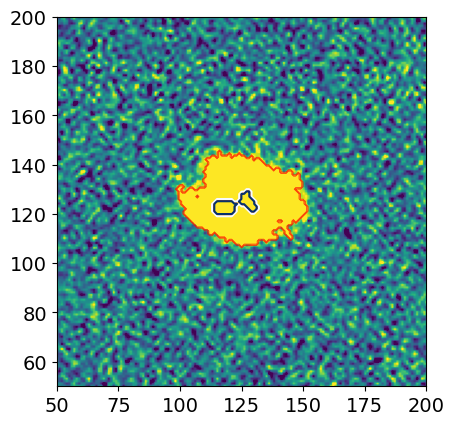

In [400]:
ek.imshow(img, )

plt.contour(mask, colors='r', linewidths=0.3)
plt.contour(lmask,cmap='Blues', levels=[0.,0.9])

plt.xlim(50,200)
plt.ylim(50,200)

In [419]:
leaf = dg.leaves[1]
(xc,yc),peakflux = leaf.get_peak()

In [420]:
Y,X = np.mgrid[:img.shape[0],:img.shape[1]]

R = np.sqrt((X - xc)**2 + (Y-yc)**2) + 0.0001

In [421]:
from ekfstats import sampling

In [429]:
pixscale

<Quantity 0.168 arcsec>

In [431]:
(pixscale * cosmo.kpc_proper_per_arcmin(redshift)).to(u.kpc)

<Quantity 0.22905982 kpc>

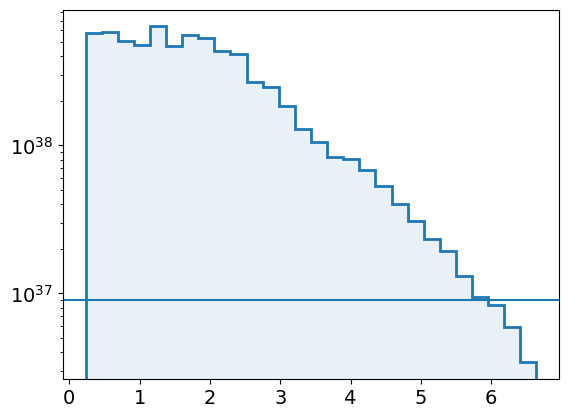

In [433]:
rbins = np.arange(1.,30.,1) 
out = ek.hist(
    R.flatten() * (pixscale * cosmo.kpc_proper_per_arcmin(redshift)).to(u.kpc).value, 
    weights=(img/(2.*np.pi*R)).flatten(), 
    bins=rbins * (pixscale * cosmo.kpc_proper_per_arcmin(redshift)).to(u.kpc).value,
    alpha=0.1,
    lw=2
)

h=2.
rm = sampling.midpts(rbins)
fn = np.exp(-rm/h)
fn /= fn[0]
#plt.plot ( rm, out[1][0][0] * fn )

plt.axhline(i_std)
plt.yscale('log')

(50.0, 200.0)

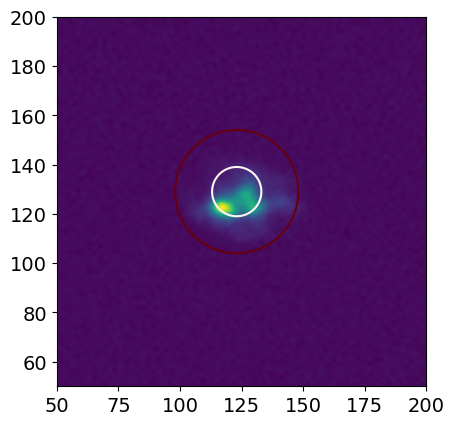

In [423]:
ek.imshow(img, q=0.)

plt.contour(R, cmap='Reds', levels=[10,25])

plt.xlim(50,200)
plt.ylim(50,200)